<a href="https://colab.research.google.com/github/uehara-takahiro/GRVI-GEI/blob/main/GRVI_GEI_project_1.2trimming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#画像からGRVIとGEIを計算して画像として表示する

グーグルドライブをマウント
ドライブから検証用画像をダウンロードして使用

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##表示する画像を選択

In [43]:
#ファイル選択を押して画像を選択
from google.colab import files
uploaded_file = files.upload()
uploaded_file_name = next(iter(uploaded_file))

Saving 7月16日.JPG to 7月16日.JPG


##読み込んだ画像を表示
・OpenCVを使って画像を読み込む cv2.imreadでOpenCV形式に変換 OpenCVはBGRなのでcvtColorでRGBに直してから表示する

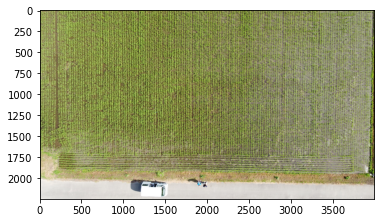

In [44]:
import cv2
from matplotlib import pyplot as plt
orig = cv2.imread(uploaded_file_name)
src = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
plt.imshow(src)

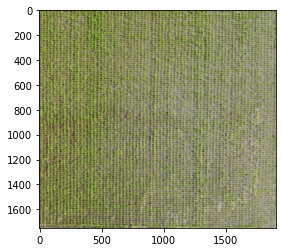

In [47]:
#画像のトリミング
img = cv2.imread('/content/drive/MyDrive/7月16日.JPG')
#上、下、左、右の画素位置を指定
src2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
src3 = src2[0:1750,2000:3900]
plt.imshow(src3)

In [48]:
#赤の画素値の合計
arrayred = src3[:, :, 0]
print(arrayred.sum())
#緑の画素値の合計
arraygreen = src3[:, :, 1]
print(arraygreen.sum())
#青の画素値の合計
arrayblue = src3[:, :, 2]
print(arrayblue.sum())



446189437
458791560
304037277


##RGBに分けた画像を表示


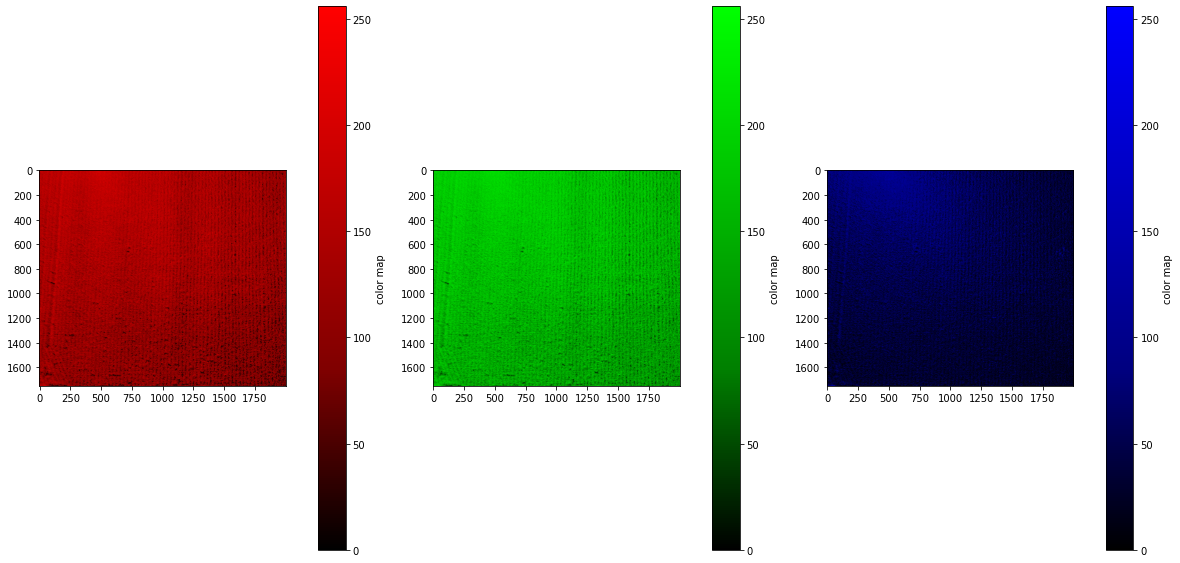

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

#カラーマップ作製
#赤
r1 = np.array([0,0,0]) / 256
r2 = np.array([128,0,0]) / 256
r3 = np.array([192,0,0]) / 256
r4 = np.array([256,0,0]) / 256
cmr = LinearSegmentedColormap.from_list(name='customred', colors=[r1, r2, r3, r4])
#緑
g1 = np.array([0,0,0]) / 256
g2 = np.array([0,128,0]) / 256
g3 = np.array([0,192,0]) / 256
g4 = np.array([0,256, 0]) / 256
cmg = LinearSegmentedColormap.from_list(name='customgreen', colors=[g1, g2, g3, g4])
#青
b1 = np.array([0,0,0]) / 256
b2 = np.array([0,0,128]) / 256
b3 = np.array([0,0,192]) / 256
b4 = np.array([0,0,256]) / 256
cmb = LinearSegmentedColormap.from_list(name='customblue', colors=[b1, b2, b3, b4])

#色の指定の最小値、最大値
vmin,vmax = 0, 256

r = np.array(src3[:, :, 0], dtype=np.int16)
g = np.array(src3[:, :, 1], dtype=np.int16)
b = np.array(src3[:, :, 2], dtype=np.int16)

#r,g,b = cv2.split(src)
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(r,cmap = cmr, vmin=vmin, vmax=vmax)
plt.colorbar( label = 'color map', pad = 0.1)
plt.subplot(1,3,2)
plt.imshow(g,cmap = cmg, vmin=vmin, vmax=vmax)
plt.colorbar( label = 'color map', pad = 0.1)
plt.subplot(1,3,3)
plt.imshow(b,cmap = cmb, vmin=vmin, vmax=vmax)
plt.colorbar( label = 'color map', pad = 0.1)

##表示用の不連続カラーマップを作製

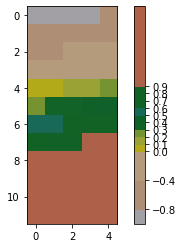

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

list_cid = ['#A2A0A5', '#A2A0A5', '#AE8F76',
            '#AE8F76', '#AE8F76', '#AE8F76',
            '#B39B7C', '#B39B7C', '#B39B7C',
            '#B39B7C', '#B2AA19', '#9AA135',
            '#759331', '#126328', '#106129',
            '#186A56', '#126226', '#126226',
            '#126227', '#AD6149', '#AD6149',
            '#AD6149', '#AD6149', '#AD6149',
            '#AD6149', '#AD6149', '#AD6149',
            '#AD6149', '#AD6149', '#AD6149']

list_label = ['-1.0～-0.9', '-0.9～-0.8','-0.8～-0.7',
              '-0.7～-0.6', '-0.6～-0.5','-0.5～-0.4',
              '-0.4～-0.3', '-0.3～-0.2','-0.2～-0.1',
              '-0.1～0.0', '0.0～0.1','0.1～0.2',
              '0.2～0.3', '0.3～0.4','0.4～0.5',
              '0.5～0.6', '0.6～0.7','0.7～0.8',
              '0.8～0.9', '0.9～1.0','1.0～1.1',
              '1.1～1.2', '1.2～1.3','1.3～1.4',
              '1.4～1.5', '1.5～1.6','1.6～1.7',
              '1.7～1.8', '1.8～1.9','1.9～2.0']
list_ticks = [-0.8, -0.4,
              0.0, 0.1,
              0.2, 0.3,
              0.4, 0.5,
              0.6, 0.7,
              0.8, 0.9,]
vmin,vmax = -1, 2
test=np.linspace(-1, 2, 60)

cm = LinearSegmentedColormap.from_list('custom_cmap', list_cid, N=len(list_cid))
plt.imshow(test.reshape(12,5), cmap=cm, interpolation='nearest', vmin=vmin, vmax=vmax)
cbar = plt.colorbar(extend='neither', ticks=list_ticks)

##GRVIを計算

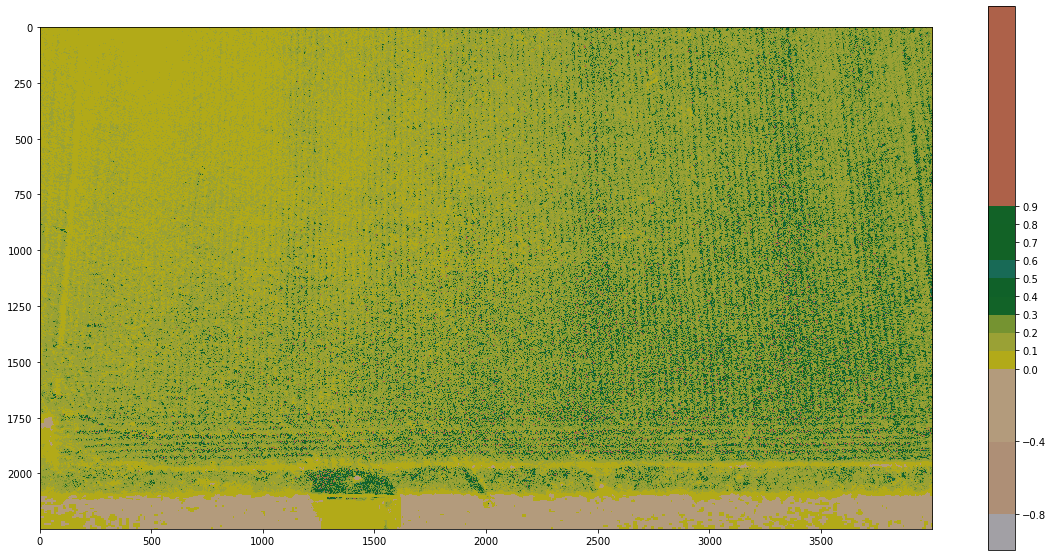

In [ ]:
#マイナスをかける
r_reverse=-1*r
#np.savetxt('/content/r_reverse.txt', r_reverse)

#分子を計算
GRVI_up=g+r_reverse

#分母を計算
GRVI_down=g+r

#0で割らないように0->1に置き換える
GRVI_down_no_zero=np.where(GRVI_down== 0, 1,GRVI_down)

#割り算
GRVI=GRVI_up/GRVI_down_no_zero

#表示
plt.figure(figsize=(20,10))
plt.imshow(GRVI,cmap = cm,interpolation='nearest', vmin=vmin, vmax=vmax)
cbar = plt.colorbar(extend='neither', ticks=list_ticks)

##GEIを計算

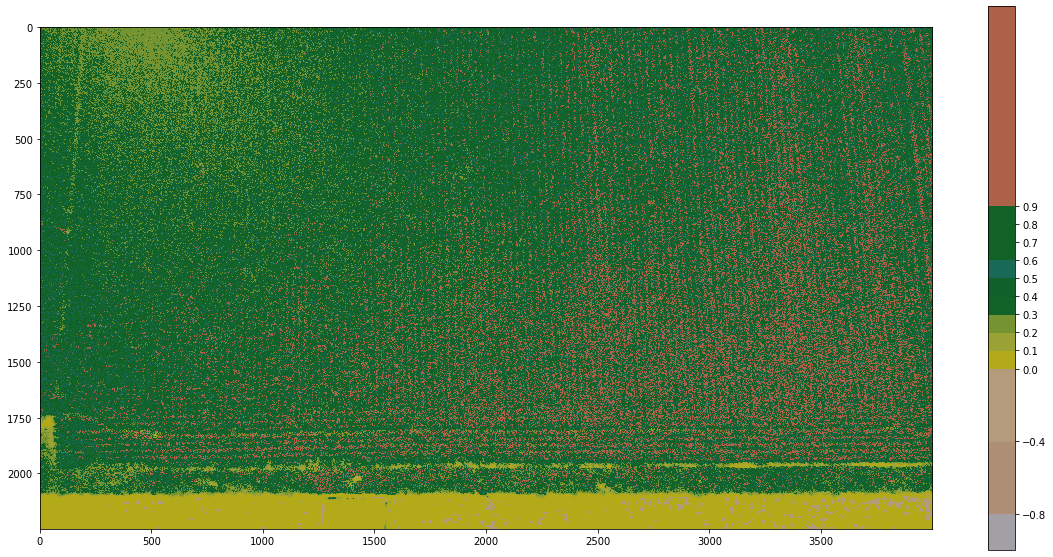

In [ ]:
#マイナスをかける
r_reverse=-1*r
b_reverse=-1*b
#np.savetxt('/content/r_reverse.txt', r_reverse)

#分子を計算
GEI_up=2*g+r_reverse+b_reverse

#分母を計算
GEI_down=r+g+b

#0で割らないように0->1に置き換える
GEI_down_no_zero=np.where(GEI_down== 0, 1,GEI_down)

#割り算
GEI=GEI_up/GEI_down_no_zero
#np.savetxt('/content/GEI.txt', GEI)
#表示
plt.figure(figsize=(20,10))
plt.imshow(GEI,cmap = cm,interpolation='nearest', vmin=vmin, vmax=vmax)
cbar = plt.colorbar(extend='neither', ticks=list_ticks)

##準NDVIを計算

y=a*log(x)+bのa=0.18、b=0.71で計算

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


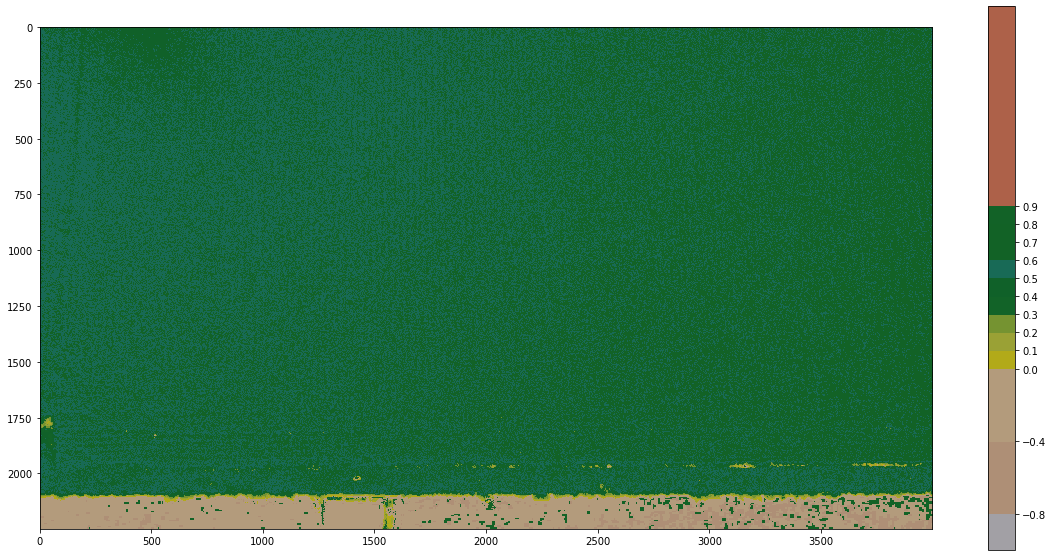

In [ ]:
#0で割らないように0->0.01に置き換える
GEI_no_zero=np.where(GEI== 0, 0.01,GEI)
#logを計算
GEI_log=np.log(GEI_no_zero)
#log(-x)は虚数となって存在しないためnanとなっているところを-0.8で置き換え
GEI_log_nonan=np.nan_to_num(GEI_log, nan=0)
#np.savetxt('/content/GEI_log_nonan.txt', GEI_log_nonan)

#画像を表示
quasi_NDVI=0.18*GEI_log_nonan+0.71
plt.figure(figsize=(20,10))
plt.imshow(quasi_NDVI,cmap = cm,interpolation='nearest', vmin=vmin, vmax=vmax)
cbar = plt.colorbar(extend='neither', ticks=list_ticks)

##緑地面積比率を計算

In [ ]:
#画像の表示
uploaded_file = DJI_0062_試験区.JPG
uploaded_file_name = next(iter(uploaded_file))
orig_sikenku = cv2.imread(DJI_0062_試験区.JPG)
src_sikenku = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
plt.imshow(src_sikenku)

NameError: ignored